# Important Libraries

In [2]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar

# Image Processing
import cv2
from PIL import Image
from skimage import io, color
from skimage.feature import hog
from skimage.transform import resize

# Deep Learning for Feature Extraction
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model

# Unsupervised Learning for Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel

import scipy
from scipy import stats
from scipy.stats import binom, poisson, norm, t
from scipy.stats import chisquare, chi2_contingency

import seaborn as sns

from random import choice

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

from statsmodels.stats import proportion as ssp

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel

import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU


from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

#from sklearn.naive_bayes import GuassianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras import datasets, layers, models
import warnings
warnings.simplefilter('ignore')

#plt.style.use('seaborn-v0_8-dark')
#plt.style.use('seaborn-v0_8-white')
plt.style.use('ggplot')
#print(plt.style.available)



# Importing the dataset and reshaping, normalizing, splitting it

In [72]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = "Rice_Image_Dataset"

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Image Data Generator for augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # Split dataset into training and validation sets
)

# Load training dataset
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
num_classes = train_generator.num_classes

# Load validation dataset
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Print class labels
print("Class indices:", train_generator.class_indices)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Class indices: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


# Showing the sample images

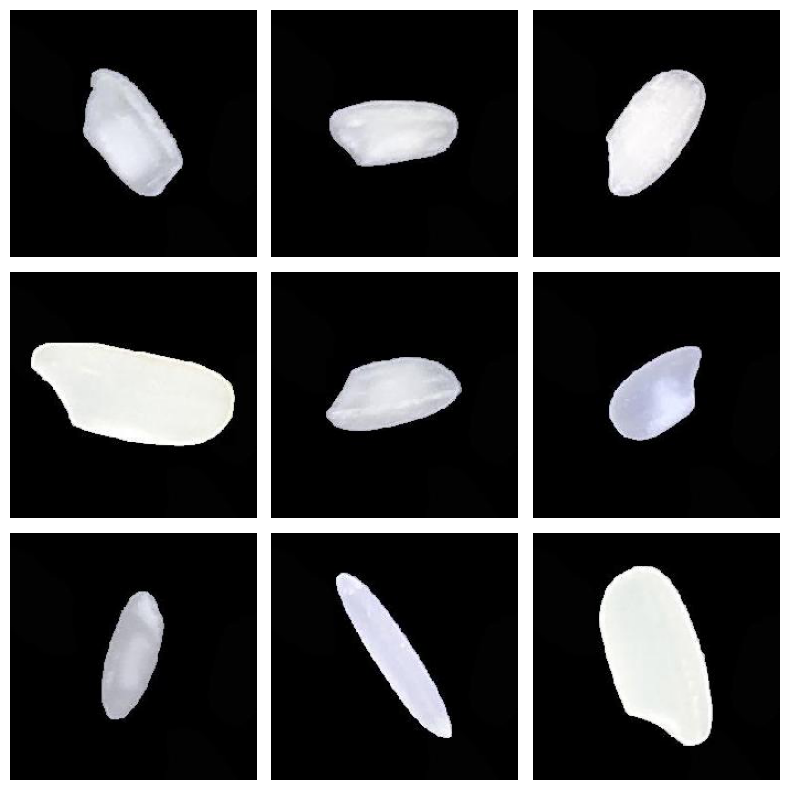

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Plot sample images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for img, ax in zip(images[:9], axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()


# Defining the CNN model

## Model Architecture

In [83]:
from tensorflow.keras import layers, models

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # ✅ Dynamic class count
])



# Model Summary

In [86]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Mode

In [89]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint("best_rice_model.keras", save_best_only=True)  # or .h5 with save_format
]

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 357s 190ms/step - accuracy: 0.9161 - loss: 0.2553 - val_accuracy: 0.9739 - val_loss: 0.0723
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 475s 253ms/step - accuracy: 0.9816 - loss: 0.0640 - val_accuracy: 0.9929 - val_loss: 0.0217
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 527s 281ms/step - accuracy: 0.9890 - loss: 0.0418 - val_accuracy: 0.9917 - val_loss: 0.0254
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 590s 315ms/step - accuracy: 0.9886 - loss: 0.0502 - val_accuracy: 0.9919 - val_loss: 0.0345
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 641s 342ms/step - accuracy: 0.9904 - loss: 0.0492 - val_accuracy: 0.9867 - val_loss: 0.1031
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 722s 385ms/step - accuracy: 0.9881 - loss: 0.1095 - val_accuracy: 0.9874 - val_loss: 0.1325


# Saving the model

In [91]:
model.save("model3.h5")

# Evaluating the model performance 

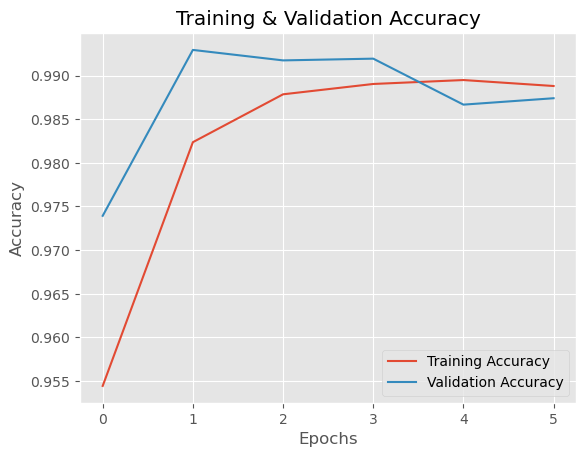

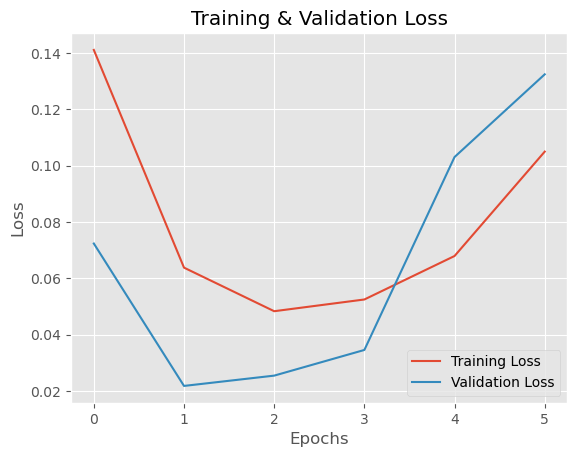

In [94]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion matrix

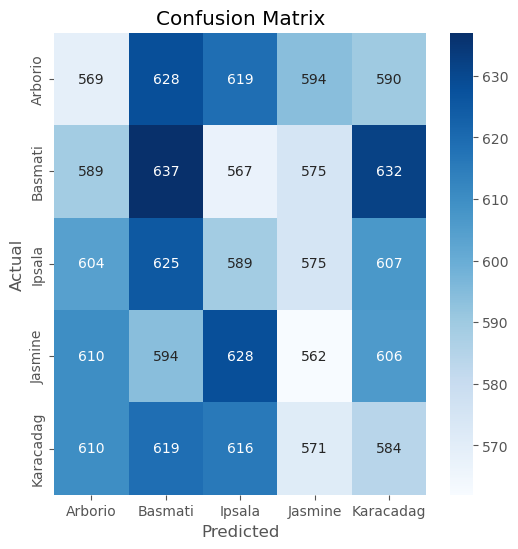

In [97]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report

In [116]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_path,  # Use the same base path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # VERY IMPORTANT:  Do not shuffle test data!
    seed=42
)

Found 75000 images belonging to 5 classes.


In [120]:
# ---- Model Evaluation and Classification Report ----
print("\nEvaluating the model and generating classification report:")
# Load the best model (from the checkpoint)
best_model = tf.keras.models.load_model("best_rice_model.keras")

# Get predictions on the test set
y_pred_probs = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))



Evaluating the model and generating classification report:
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 72s 31ms/step

Classification Report:

              precision    recall  f1-score   support

     Arborio       1.00      0.98      0.99     15000
     Basmati       1.00      0.99      1.00     15000
      Ipsala       0.99      1.00      1.00     15000
     Jasmine       0.99      0.99      0.99     15000
   Karacadag       0.99      1.00      0.99     15000

    accuracy                           0.99     75000
   macro avg       0.99      0.99      0.99     75000
weighted avg       0.99      0.99      0.99     75000



#   ROC Curve & AUC Score

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step


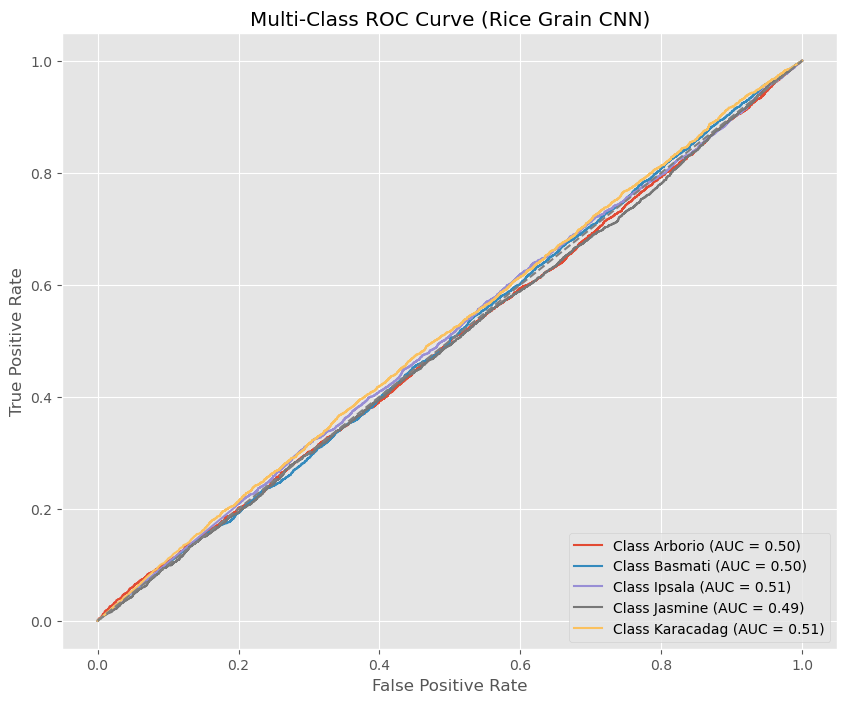

In [136]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Predict probabilities
y_pred_prob = model.predict(val_generator)  # or model.predict(X_test)
y_true = val_generator.classes  # or use y_test if not using generator

# Step 2: Binarize true labels
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

# Step 3: Get class names
class_names = list(val_generator.class_indices.keys())

# Step 4: Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve (Rice Grain CNN)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
